In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import nltk 
import re
from textblob import TextBlob
import seaborn as sns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Joseph\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Joseph\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Joseph\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40324 entries, 0 to 40323
Data columns (total 7 columns):
Id             40324 non-null int64
drugName       40324 non-null object
condition      40105 non-null object
review         40324 non-null object
rating         40324 non-null int64
date           40324 non-null object
usefulCount    40324 non-null int64
dtypes: int64(3), object(4)
memory usage: 2.2+ MB


C:\Users\Joseph\Anaconda3\lib\site-packages\pandas\core\ops.py:1167: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


TypeError: invalid type comparison

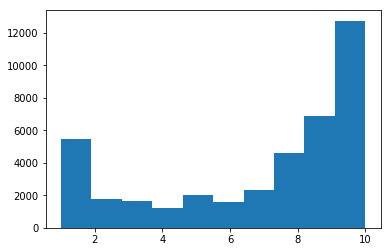

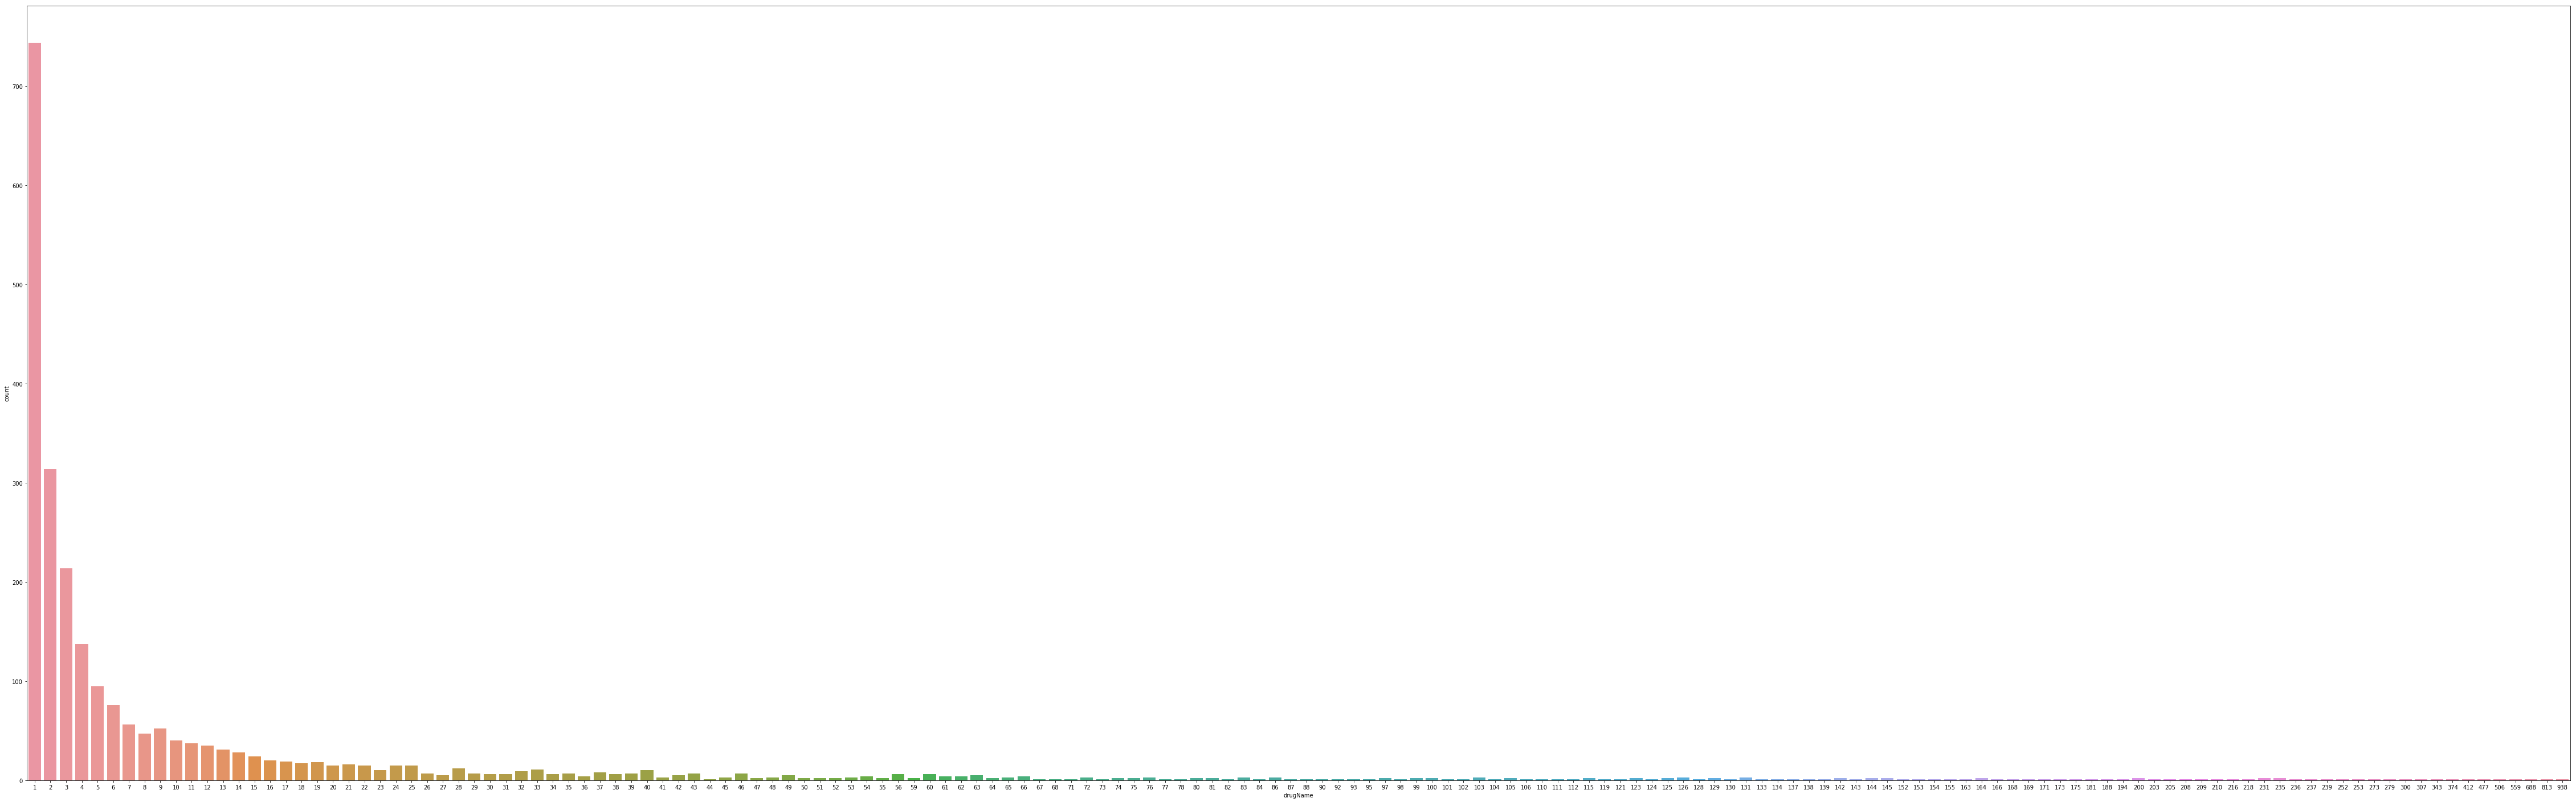

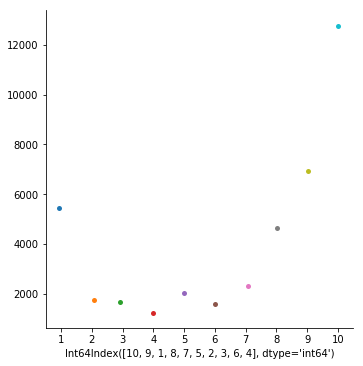

In [9]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet') 


medicineDf=pd.read_csv("C:\\Users\\Joseph\\Documents\\Excel_R_Project\\train.csv")
 

"""
#################  EDA   ################
"""
medicineDf.columns
str(medicineDf)
medicineDf.info()
medicineDf.describe()
medicineDf.head(20)
medicineDf.isnull().sum()
medicineDf.isnull()

plt.hist(medicineDf.rating)


#Drug Count
drugs = pd.value_counts(medicineDf.drugName)
drugs.head(20)
drugs[drugs == drugs.min()].head(20)

fig = plt.figure(figsize = (80,25))
sns.countplot(drugs)

#Rating Count
ratingValue = pd.value_counts(medicineDf.rating)

rateDf = ratingValue.to_frame()
sns.catplot(x= rateDf.index,y= rateDf.rating,data=rateDf)

sns.catplot(x="drugName",y="rating",jitter = False,data = medicineDf)

rating_count=medicineDf.groupby('rating').count()
plt.bar(rating_count.index.values, rating_count['review'])
plt.xlabel('Review')
plt.ylabel('Number of Review')
plt.show()


#Condition Count
conditions = pd.value_counts(medicineDf.condition)
sns.countplot(conditions)

#Maximum number of useful count 
medicineDf.usefulCount.idxmax() 
use = max(medicineDf.usefulCount)
 
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))

from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer 
ps = PorterStemmer() 
 




In [13]:
drugsGrp = medicineDf.groupby(['drugName'])
f = drugsGrp.first()
#p = drugsGrp.get_group('Ibuprofen')
#review = p.review
drugGroup = drugsGrp.describe()
drugGroup.columns
#drugGroup.drop(drugGroup.columns[[0]],axis=1,inplace = True)

drugDTMdf = pd.DataFrame(columns = ['drugName' , 'Review'])
drugDTMdf = drugDTMdf[0:0]
review = ' '
stem_word = ' '
#### Filter the words for a particular drug name
#review = medicineDf.review[0:199]
for drugName, group in drugsGrp:
 
            p = drugsGrp.get_group(drugName)
            review = p.review

            
            

In [26]:
         filtered_list= []
            for r in review:
                filtered_word=[]
                w = 0
                tokenized_word=word_tokenize(r) 
                tokenized_word = [x.lower() for x in tokenized_word] 
                for w in tokenized_word:
                    if w not in stop_words:
                        stem_word = ps.stem(w)
                        filtered_word.append(stem_word)

                filtered_word = ["".join(list(filter(str.isalnum, line))) for line in filtered_word]
                pattern = '[0-9]'
                filtered_word = [re.sub(pattern, '', i) for i in filtered_word] 
                filtered_word = [i for i in filtered_word if i] 
                filtered_list.extend(filtered_word)
            

IndentationError: unexpected indent (<ipython-input-26-514c32600ffe>, line 2)

In [22]:
comment_words = ' '
 review = ' '
            
            #Combine all reviews for a drug in one text
            for val in filtered_list:       
                # typecaste each val to string 
                val = str(val)   
                # split the value 
                tokens = val.split()       
                # Converts each token into lowercase 
                for i in range(len(tokens)): 
                    tokens[i] = tokens[i].lower()           
                for words in tokens: 
                    comment_words = comment_words + words + ' '
#            print(drugName)
#            print(comment_words)
            drugDTMdf = drugDTMdf.append({'drugName' : drugName , 'Review' : comment_words} , ignore_index=True)


IndentationError: unexpected indent (<ipython-input-22-a411425b6116>, line 2)